<Axes: xlabel='DATETIMEDATA'>

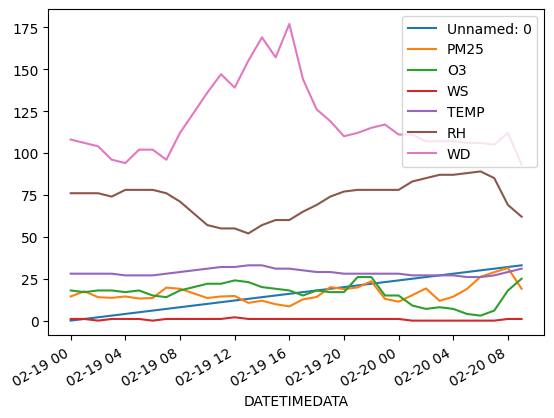

In [10]:
import pandas as pd
data = pd.read_csv('Clean_data.csv')
data["DATETIMEDATA"] = pd.to_datetime(data["DATETIMEDATA"])
data.set_index('DATETIMEDATA', inplace=True)
data.head()
data.plot()

In [14]:
data['MA12'] = data['PM25'].rolling(12).mean()

import plotly.express as px
fig = px.line(data.reset_index(), x='DATETIMEDATA', y=['PM25', 'MA12'], template='plotly_dark')
fig.show()
print(data.head())


                     Unnamed: 0  PM25    O3  WS  TEMP  RH   WD  MA12
DATETIMEDATA                                                        
2024-02-19 00:00:00           0  14.4  18.0   1    28  76  108   NaN
2024-02-19 01:00:00           1  17.5  17.0   1    28  76  106   NaN
2024-02-19 02:00:00           2  14.0  18.0   0    28  76  104   NaN
2024-02-19 03:00:00           3  13.6  18.0   1    28  74   96   NaN
2024-02-19 04:00:00           4  14.4  17.0   1    27  78   94   NaN


In [16]:
train = data[data.index < '2024-02-20 00:00:00']
test = data[data.index >= '2024-02-20 00:00:00']


In [20]:

from pycaret.regression import *
s = setup(data = train, test_data = test, target = 'PM25',  fold = 3, transform_target = True, session_id = 123)


,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(33, 8)"
4,Transformed data shape,"(33, 8)"
5,Transformed train set shape,"(23, 8)"
6,Transformed test set shape,"(10, 8)"
7,Numeric features,7
8,Rows with missing values,33.3%
9,Preprocess,True


In [21]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,1.5361,5.9721,1.9865,-0.0897,0.1138,0.0930,0.0300
dummy,Dummy Regressor,2.9916,16.1935,3.8265,-0.5165,0.2364,0.2011,0.0100
lightgbm,Light Gradient Boosting Machine,2.9916,16.1933,3.8265,-0.5165,0.2364,0.2011,0.0200
gbr,Gradient Boosting Regressor,3.6722,18.7747,4.2277,-1.2708,0.2569,0.2439,0.0200
et,Extra Trees Regressor,3.7717,19.0189,4.2975,-1.3202,0.2599,0.2533,0.0333
ada,AdaBoost Regressor,3.7870,20.3561,4.4455,-1.6860,0.2684,0.2596,0.0233
rf,Random Forest Regressor,3.7950,21.1559,4.4802,-1.4108,0.2756,0.2547,0.0367
lasso,Lasso Regression,3.9014,21.6658,4.6257,-1.9430,0.2790,0.2751,0.4267
llar,Lasso Least Angle Regression,3.9014,21.6658,4.6257,-1.9430,0.2790,0.2751,0.4367
knn,K Neighbors Regressor,3.9520,21.0112,4.5498,-1.9694,0.2731,0.2792,0.0167


In [22]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,6.6915,77.1645,8.7843,-0.7244,0.4397,0.3058


In [25]:
# Assuming 'Passengers' is the target column you want to predict
predictions = predict_model(best, data=data)

# Generating date range for the predictions
predictions['Date'] = pd.date_range(start='2024-02-19', periods=len(predictions), freq='H')

# Creating a line plot
import plotly.express as px
fig = px.line(predictions, x='Date', y=["Passengers", "Label"], template='plotly_dark')

# Adding a vertical rectangle for a specific date range
fig.add_vrect(x0="2024-02-20 00:00:00", x1="2024-02-20 09:00:00", fillcolor="grey", opacity=0.25, line_width=0)

# Showing the plot
fig.show()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,4.2042,34.1517,5.8439,-0.2569,0.3190,0.2282


ValueError: All arguments should have the same length. The length of argument `y` is 2, whereas the length of  previously-processed arguments ['Date'] is 33